Importing all modules needed.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_squared_error

Loading the dataset

In [6]:
train = pd.read_csv('train_FD001.txt', sep='\s+', header=None)
test = pd.read_csv('test_FD001.txt', sep='\s+', header=None)
rul_true = pd.read_csv('RUL_FD001.txt', header=None)
rul_true.columns = ['RUL']

Assign columns name

In [15]:
columns = ['unit_number', 'time_in_cycles'] + \
          [f'op_setting_{i}' for i in range(1, 4)] + \
          [f'sensor_measurement_{i}' for i in range(1, 22)]
train.columns = columns
test.columns = columns

Compute RUL for the training set

In [37]:
train['RUL'] = train.groupby('unit_number')['time_in_cycles'].transform('max') - train['time_in_cycles']
train

,unit_number,time_in_cycles,op_setting_1,op_setting_2,op_setting_3,sensor_measurement_1,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_5,...,sensor_measurement_13,sensor_measurement_14,sensor_measurement_15,sensor_measurement_16,sensor_measurement_17,sensor_measurement_18,sensor_measurement_19,sensor_measurement_20,sensor_measurement_21,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,0.183735,0.406802,0.309757,14.62,...,0.205882,0.199608,0.363986,0.03,0.333333,2388,100.0,0.713178,0.724662,191
1,1,2,0.0019,-0.0003,100.0,518.67,0.283133,0.453019,0.352633,14.62,...,0.279412,0.162813,0.411312,0.03,0.333333,2388,100.0,0.666667,0.731014,190
2,1,3,-0.0043,0.0003,100.0,518.67,0.343373,0.369523,0.370527,14.62,...,0.220588,0.171793,0.357445,0.03,0.166667,2388,100.0,0.627907,0.621375,189
3,1,4,0.0007,0.0000,100.0,518.67,0.343373,0.256159,0.331195,14.62,...,0.294118,0.174889,0.166603,0.03,0.333333,2388,100.0,0.573643,0.662386,188
4,1,5,-0.0019,-0.0002,100.0,518.67,0.349398,0.257467,0.404625,14.62,...,0.235294,0.174734,0.402078,0.03,0.416667,2388,100.0,0.589147,0.704502,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,0.686747,0.587312,0.782917,14.62,...,0.558824,0.194344,0.656791,0.03,0.750000,2388,100.0,0.271318,0.109500,4
20627,100,197,-0.0016,-0.0005,100.0,518.67,0.701807,0.729453,0.866475,14.62,...,0.500000,0.188668,0.727203,0.03,0.583333,2388,100.0,0.124031,0.366197,3
20628,100,198,0.0004,0.0000,100.0,518.67,0.665663,0.684979,0.775321,14.62,...,0.529412,0.212148,0.922278,0.03,0.833333,2388,100.0,0.232558,0.053991,2
20629,100,199,-0.0011,0.0003,100.0,518.67,0.608434,0.746021,0.747468,14.62,...,0.514706,0.203065,0.823394,0.03,0.583333,2388,100.0,0.116279,0.234466,1


Taking only the useful sensors

In [21]:
selected_sensors = ['sensor_measurement_2', 'sensor_measurement_3', 'sensor_measurement_4',
                    'sensor_measurement_7', 'sensor_measurement_8', 'sensor_measurement_9',
                    'sensor_measurement_11', 'sensor_measurement_12', 'sensor_measurement_13',
                    'sensor_measurement_14', 'sensor_measurement_15', 'sensor_measurement_17',
                    'sensor_measurement_20', 'sensor_measurement_21']


Normalize selected sensors

In [22]:
scaler = MinMaxScaler()
train[selected_sensors] = scaler.fit_transform(train[selected_sensors])
test[selected_sensors] = scaler.transform(test[selected_sensors])

Train using cycle of each engine

In [38]:
latest_train = train.dropna();
X_train = latest_train[selected_sensors]
y_train = latest_train['RUL']

Train Linear Regrassion model

In [45]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Prepare the test data (last cycle of each engine)

In [46]:
latest_test = test.groupby('unit_number').tail(1)
x_test = latest_test[selected_sensors]
y_pred = model.predict(x_test)
y_true = rul_true['RUL'].values

In [52]:
latest_test

,unit_number,time_in_cycles,op_setting_1,op_setting_2,op_setting_3,sensor_measurement_1,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_5,...,sensor_measurement_12,sensor_measurement_13,sensor_measurement_14,sensor_measurement_15,sensor_measurement_16,sensor_measurement_17,sensor_measurement_18,sensor_measurement_19,sensor_measurement_20,sensor_measurement_21
30,1,31,-0.0006,0.0004,100.0,518.67,0.412651,0.221932,0.281229,14.62,...,0.660981,0.264706,0.155692,0.298192,0.03,0.416667,2388,100.0,0.519380,0.636564
79,2,49,0.0018,-0.0001,100.0,518.67,0.403614,0.339002,0.482444,14.62,...,0.650320,0.308824,0.139127,0.483263,0.03,0.250000,2388,100.0,0.519380,0.507595
205,3,126,-0.0016,0.0004,100.0,518.67,0.503012,0.407892,0.618501,14.62,...,0.456290,0.382353,0.162659,0.334744,0.03,0.583333,2388,100.0,0.612403,0.524441
311,4,106,0.0012,0.0004,100.0,518.67,0.472892,0.512099,0.415766,14.62,...,0.680171,0.338235,0.173909,0.532897,0.03,0.583333,2388,100.0,0.341085,0.502486
409,5,98,-0.0013,-0.0004,100.0,518.67,0.319277,0.412034,0.626435,14.62,...,0.492537,0.397059,0.133141,0.428242,0.03,0.500000,2388,100.0,0.472868,0.714582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12545,96,97,-0.0006,0.0003,100.0,518.67,0.328313,0.432527,0.264855,14.62,...,0.769723,0.191176,0.249252,0.331281,0.03,0.250000,2388,100.0,0.635659,0.782104
12679,97,134,0.0013,-0.0001,100.0,518.67,0.415663,0.259865,0.483964,14.62,...,0.616205,0.264706,0.286614,0.481339,0.03,0.583333,2388,100.0,0.364341,0.553853
12800,98,121,0.0017,0.0001,100.0,518.67,0.442771,0.620667,0.560770,14.62,...,0.605544,0.308824,0.239705,0.379377,0.03,0.500000,2388,100.0,0.480620,0.644297
12897,99,97,0.0047,-0.0000,100.0,518.67,0.237952,0.304992,0.265530,14.62,...,0.667377,0.205882,0.260295,0.290112,0.03,0.250000,2388,100.0,0.627907,0.642502


Evaluation

In [47]:
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

In [48]:
print("MAE:", round(mae, 2))
print("RMSE:", round(rmse, 2))
print("First 5 True RULs:", y_true[:5])
print("First 5 Predicted RULs:", np.round(y_pred[:5], 2))

MAE: 25.54
RMSE: 31.95
First 5 True RULs: [112  98  69  82  91]
First 5 Predicted RULs: [158.34 122.32  84.45  97.99 112.08]


Sate view

In [53]:
def state(rul):
    if rul > 80:
        return 'Healthy'
    elif rul > 30:
        return 'Needs Maintenance'
    elif rul > 10:
        return 'Immediate Maintenance Required'
    else:
        return "Unsafe to Use"

In [55]:
statuses = [state(r) for r in y_pred]

In [58]:
state_df = pd.DataFrame({
    'Predicted RUL': np.round(y_pred, 2),
    'True RUL': y_true,
    'Status': statuses
})
state_df

,Predicted RUL,True RUL,Status
0,158.34,112,Healthy
1,122.32,98,Healthy
2,84.45,69,Healthy
3,97.99,82,Healthy
4,112.08,91,Healthy
...,...,...,...
95,166.79,137,Healthy
96,108.43,82,Healthy
97,98.67,59,Healthy
98,161.86,117,Healthy


Visualization: line plot

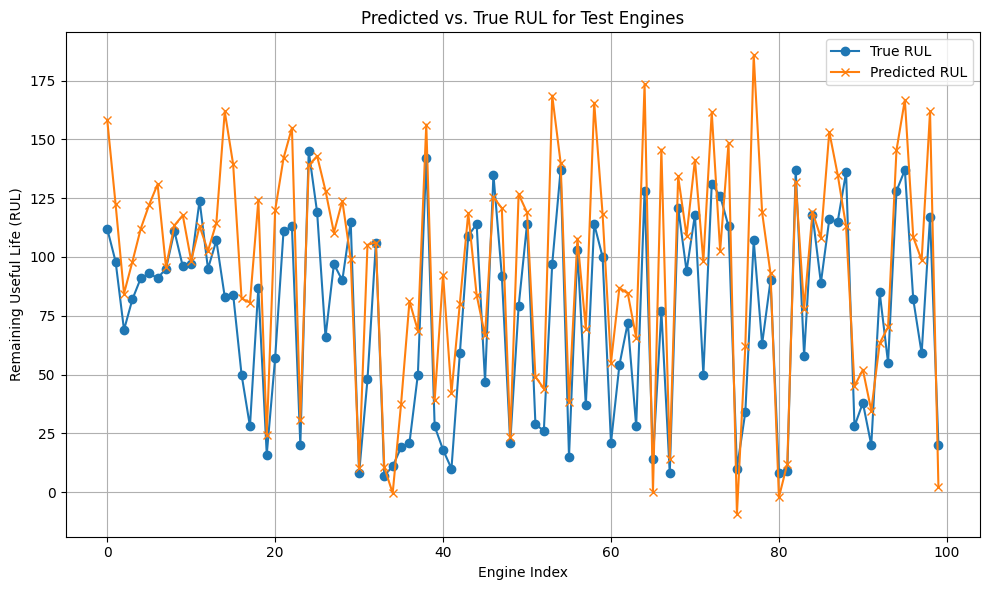

In [49]:
plt.figure(figsize=(10, 6))
plt.plot(y_true, label='True RUL', marker='o')
plt.plot(y_pred, label='Predicted RUL', marker='x')
plt.xlabel('Engine Index')
plt.ylabel('Remaining Useful Life (RUL)')
plt.title('Predicted vs. True RUL for Test Engines')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Visualization scatter plot

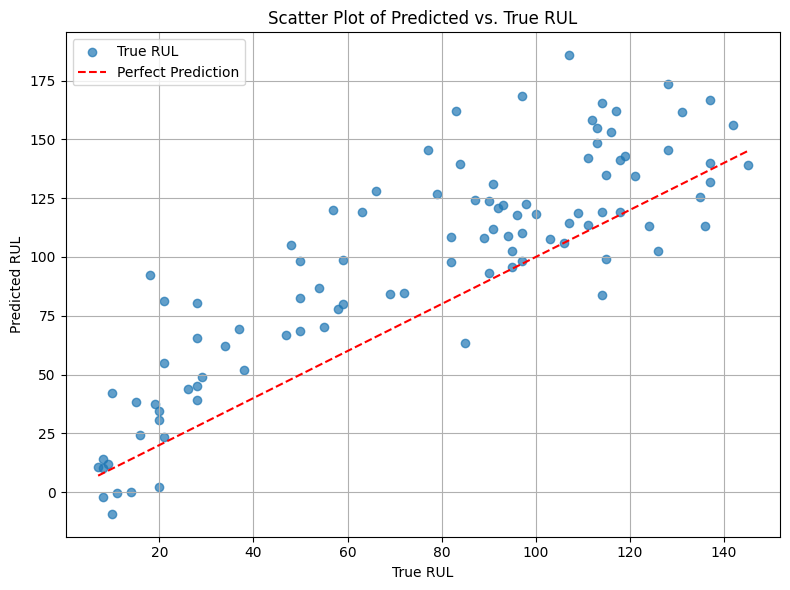

In [51]:
plt.figure(figsize=(8, 6))
plt.scatter(y_true, y_pred, alpha=0.7, label = 'True RUL')
plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], 'r--', label='Perfect Prediction')
plt.xlabel('True RUL')
plt.ylabel('Predicted RUL')
plt.title('Scatter Plot of Predicted vs. True RUL')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()